In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dates = np.load('../data/price/date.npy')
BTC = np.load('../data/price/BTC-USD.npy')
ETH = np.load('../data/price/ETH-USD.npy')

In [3]:
df_btc = pd.DataFrame(BTC, index=pd.to_datetime(dates, unit='s'), columns=['low', 'high', 'open', 'close', 'vol'])
df_eth = pd.DataFrame(ETH, index=pd.to_datetime(dates, unit='s'), columns=['low', 'high', 'open', 'close', 'vol'])

In [4]:
df_btc.shape

(1427069, 5)

In [4]:
df_btc

,low,high,open,close,vol
2020-01-01 00:00:00,7158.00,7165.72,7165.72,7158.01,7.623856
2020-01-01 00:01:00,7151.92,7160.18,7158.01,7154.84,20.386676
2020-01-01 00:02:00,7155.00,7158.65,7156.07,7158.65,5.283010
2020-01-01 00:03:00,7156.13,7161.78,7158.51,7161.73,1.027215
2020-01-01 00:04:00,7155.00,7158.90,7158.90,7155.00,6.992341
...,...,...,...,...,...
2022-09-22 03:54:00,18702.75,18718.57,18709.88,18715.06,12.906889
2022-09-22 03:55:00,18700.19,18715.64,18715.07,18702.90,14.406923
2022-09-22 03:56:00,18701.97,18710.11,18703.28,18710.11,7.305281
2022-09-22 03:57:00,18694.65,18716.87,18710.07,18700.71,25.155395


In [6]:
df_btc[df_btc.isna().all(axis=1)]

,low,high,open,close,vol
2020-01-05 12:21:00,NaN,NaN,NaN,NaN,NaN
2020-01-12 08:52:00,NaN,NaN,NaN,NaN,NaN
2020-01-12 11:04:00,NaN,NaN,NaN,NaN,NaN
2020-01-12 11:45:00,NaN,NaN,NaN,NaN,NaN
2020-01-21 23:21:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-08-12 11:26:00,NaN,NaN,NaN,NaN,NaN
2022-08-12 11:27:00,NaN,NaN,NaN,NaN,NaN
2022-08-12 11:28:00,NaN,NaN,NaN,NaN,NaN
2022-08-12 11:29:00,NaN,NaN,NaN,NaN,NaN


In [7]:
df_eth.shape

(1427069, 5)

In [8]:
df_eth[df_eth.isna().all(axis=1)]

,low,high,open,close,vol
2020-01-01 04:25:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:52:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 05:09:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 05:11:00,NaN,NaN,NaN,NaN,NaN
2020-01-01 05:14:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-08-12 11:26:00,NaN,NaN,NaN,NaN,NaN
2022-08-12 11:27:00,NaN,NaN,NaN,NaN,NaN
2022-08-12 11:28:00,NaN,NaN,NaN,NaN,NaN
2022-08-12 11:29:00,NaN,NaN,NaN,NaN,NaN


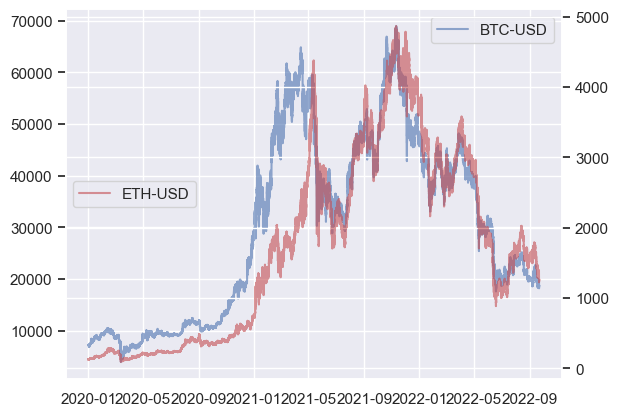

In [9]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(df_btc.close, label='BTC-USD', alpha=0.6)
ax1.plot(df_eth.close, label='ETH-USD', c='r', alpha=0.6)
ax.legend()
ax1.legend(loc='center left')

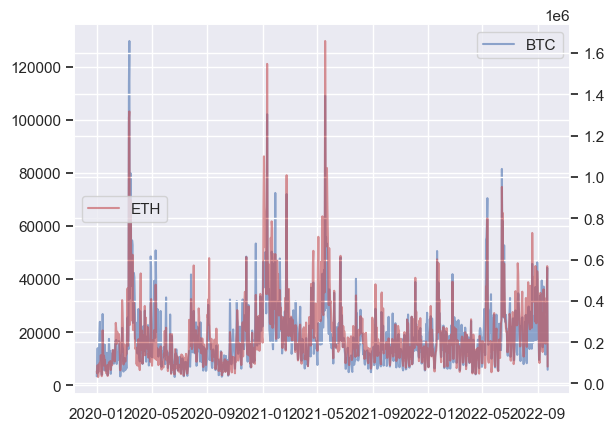

In [10]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(df_btc.groupby(df_btc.index.date).vol.sum(), label='BTC', alpha=0.6)
ax1.plot(df_eth.groupby(df_eth.index.date).vol.sum(), label='ETH', c='r', alpha=0.6)
ax.legend()
ax1.legend(loc='center left')

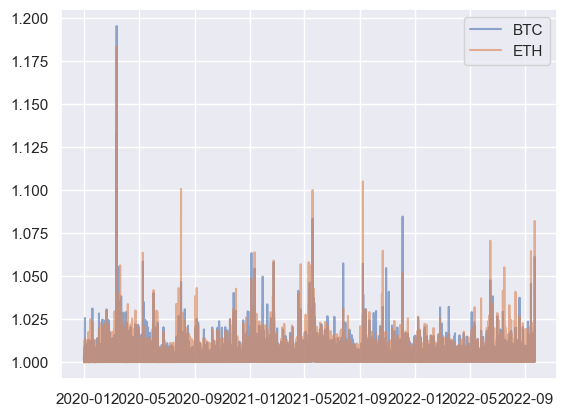

In [11]:
plt.plot(df_btc.high/df_btc.low, label='BTC', alpha=0.6)
plt.plot(df_eth.high/df_eth.low, label='ETH', alpha=0.6)
plt.legend()


In [12]:
df_btc['ret1'] = np.log(df_btc.close/df_btc.open)
df_btc['ret2'] = np.log(df_btc.close).diff()
df_btc

,low,high,open,close,vol,ret1,ret2
2020-01-01 00:00:00,7158.00,7165.72,7165.72,7158.01,7.623856,-0.001077,NaN
2020-01-01 00:01:00,7151.92,7160.18,7158.01,7154.84,20.386676,-0.000443,-0.000443
2020-01-01 00:02:00,7155.00,7158.65,7156.07,7158.65,5.283010,0.000360,0.000532
2020-01-01 00:03:00,7156.13,7161.78,7158.51,7161.73,1.027215,0.000450,0.000430
2020-01-01 00:04:00,7155.00,7158.90,7158.90,7155.00,6.992341,-0.000545,-0.000940
...,...,...,...,...,...,...,...
2022-09-22 03:54:00,18702.75,18718.57,18709.88,18715.06,12.906889,0.000277,0.000273
2022-09-22 03:55:00,18700.19,18715.64,18715.07,18702.90,14.406923,-0.000650,-0.000650
2022-09-22 03:56:00,18701.97,18710.11,18703.28,18710.11,7.305281,0.000365,0.000385
2022-09-22 03:57:00,18694.65,18716.87,18710.07,18700.71,25.155395,-0.000500,-0.000503


In [13]:
df_eth['ret1'] = np.log(df_eth.close/df_eth.open)
df_eth['ret2'] = np.log(df_eth.close).diff()
df_eth

,low,high,open,close,vol,ret1,ret2
2020-01-01 00:00:00,128.41,128.54,128.54,128.41,45.547828,-0.001012,NaN
2020-01-01 00:01:00,128.40,128.41,128.41,128.41,6.623134,0.000000,0.000000
2020-01-01 00:02:00,128.35,128.41,128.40,128.35,41.532319,-0.000389,-0.000467
2020-01-01 00:03:00,128.35,128.41,128.35,128.39,31.112647,0.000312,0.000312
2020-01-01 00:04:00,128.35,128.41,128.38,128.35,36.884010,-0.000234,-0.000312
...,...,...,...,...,...,...,...
2022-09-22 03:54:00,1264.41,1265.12,1264.95,1264.87,41.082408,-0.000063,-0.000047
2022-09-22 03:55:00,1263.49,1265.11,1264.88,1263.60,49.717025,-0.001012,-0.001005
2022-09-22 03:56:00,1263.46,1264.04,1263.56,1263.86,41.461887,0.000237,0.000206
2022-09-22 03:57:00,1261.63,1264.43,1263.94,1262.34,225.206688,-0.001267,-0.001203


In [18]:
ret1s = pd.concat([df_eth.ret1, df_btc.ret1], axis=1)
ret1s.columns=['eth', 'btc']

In [19]:
ret1s.corr()

,eth,btc
eth,1.000000,0.802902
btc,0.802902,1.000000


<AxesSubplot:>

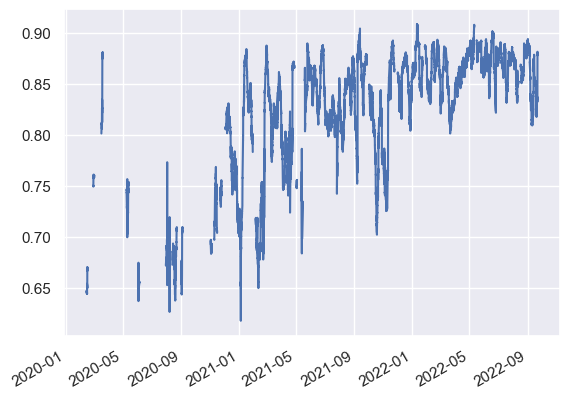

In [14]:
df_eth.ret1.rolling(1440*5).corr(df_btc.ret1).plot()

In [15]:
df_btc.describe()

,low,high,open,close,vol,ret1,ret2
count,1.426278e+06,1.426278e+06,1.426278e+06,1.426278e+06,1.426278e+06,1.426278e+06,1.426178e+06
mean,2.995023e+04,2.998805e+04,2.996928e+04,2.996935e+04,1.255687e+01,3.061636e-06,6.417686e-07
std,1.757911e+04,1.760204e+04,1.759063e+04,1.759064e+04,2.213289e+01,1.151039e-03,1.157482e-03
min,3.858000e+03,4.015280e+03,3.933800e+03,3.936500e+03,8.671000e-05,-1.172509e-01,-1.172509e-01
25%,1.114502e+04,1.115486e+04,1.115017e+04,1.115014e+04,2.987502e+00,-4.136553e-04,-4.195483e-04
50%,3.044224e+04,3.048481e+04,3.046326e+04,3.046321e+04,6.580018e+00,0.000000e+00,0.000000e+00
75%,4.439722e+04,4.444644e+04,4.442166e+04,4.442128e+04,1.407344e+01,4.139237e-04,4.161033e-04
max,6.878669e+04,6.900000e+04,6.899776e+04,6.899776e+04,1.549613e+03,9.812938e-02,8.545484e-02


In [16]:
df_eth.describe()

,low,high,open,close,vol,ret1,ret2
count,1.424469e+06,1.424469e+06,1.424469e+06,1.424469e+06,1.424469e+06,1.424469e+06,1.422683e+06
mean,1.728029e+03,1.730837e+03,1.729443e+03,1.729448e+03,1.646461e+02,3.392540e-06,1.621664e-06
std,1.327004e+03,1.328959e+03,1.327991e+03,1.327993e+03,2.963330e+02,1.437500e-03,1.459169e-03
min,9.000000e+01,9.171000e+01,9.035000e+01,9.058000e+01,6.230000e-06,-9.068453e-02,-1.150949e-01
25%,3.747000e+02,3.750600e+02,3.749000e+02,3.749000e+02,3.359268e+01,-5.564149e-04,-5.738599e-04
50%,1.676180e+03,1.678920e+03,1.677510e+03,1.677510e+03,8.023534e+01,0.000000e+00,0.000000e+00
75%,2.826390e+03,2.830750e+03,2.828650e+03,2.828600e+03,1.807541e+02,5.585883e-04,5.738280e-04
max,4.863000e+03,4.867810e+03,4.864970e+03,4.864970e+03,2.206072e+04,1.059542e-01,9.481989e-02


In [28]:
df_btc.groupby(df_btc.index.year).describe()

low                                                             \
         count          mean          std       min        25%        50%   
2019  105015.0   7343.283274  2640.897698   3337.87   4183.870   7807.220   
2020  105300.0  11061.987127  4241.495883   3858.00   8847.730   9688.055   
2021  105109.0  47300.085051  9815.583513  27678.00  38010.770  47852.670   
2022   74975.0  32202.621253  9399.447979  17567.45  21985.825  31578.250   

                                high                ...      ret1            \
             75%       max     count          mean  ...       75%       max   
2019   9559.9500  13805.59  105015.0   7361.000061  ...  0.000699  0.074272   
2020  11624.5925  29204.71  105300.0  11088.483467  ...  0.000831  0.116456   
2021  56129.1100  68566.00  105109.0  47463.371895  ...  0.001268  0.074418   
2022  40881.1000  48137.20   74975.0  32291.571767  ...  0.000908  0.040005   

          ret2                                                              \
         count      mean       std       min       25%       50%       75%   
2019  105007.0  0.000006  0.002286 -0.085884 -0.000688  0.000000  0.000702   
2020  105285.0  0.000013  0.002437 -0.104997 -0.000784  0.000002  0.000830   
2021  105107.0  0.000004  0.002985 -0.103845 -0.001274 -0.000010  0.001263   
2022   74974.0 -0.000011  0.002188 -0.043872 -0.000921  0.000004  0.000903   

                
           max  
2019  0.074272  
2020  0.115808  
2021  0.064180  
2022  0.039902  

[4 rows x 56 columns]

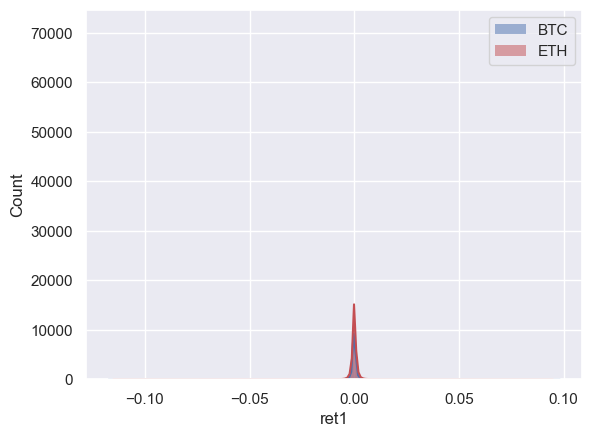

In [17]:
sns.histplot(df_btc.ret1, kde=True, label='BTC', alpha=0.5)
sns.histplot(df_eth.ret2, kde=True, label='ETH', color ='r', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
df_btc